## Домашнє завдання до модуля «Алгоритми навчання з вчителем Ч.2»

### 1. Здійсніть імпорт необхідних пакетів.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report



 ### 2. Завантажте набір даних Rain in Australia

In [2]:
# Завантаження датасету
data = pd.read_csv('rain_in_australia.csv')

# Перегляд перших кількох рядків
print(data.head())


         Date Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No            No
1  2008-12-02   Albury      7.4  ...     24.3         No            No
2  2008-12-03   Albury     12.9  ...     23.2         No            No
3  2008-12-04   Albury      9.2  ...     26.5         No            No
4  2008-12-05   Albury     17.5  ...     29.7         No            No

[5 rows x 23 columns]


In [3]:
# Підрахунок пропущених значень
missing_values = data.isnull().sum()

# Відображення кількості пропущених значень у кожному стовпці
print(missing_values)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


### 3: Видалення ознак з великою кількістю пропущених значень

In [4]:
# Встановимо поріг для видалення ознак з великою кількістю пропусків
threshold = 0.3  # Наприклад, якщо пропущено більше 30% значень

# Обчислюємо частку пропущених значень у кожному стовпці
missing_ratio = data.isnull().sum() / len(data)

# Вибираємо лише ті стовпці, де частка пропусків менша за поріг
columns_to_keep = missing_ratio[missing_ratio < threshold].index

# Оновлюємо датасет, залишаючи лише вибрані стовпці
data = data[columns_to_keep]

# Перевіряємо нові розміри датасету
print(f"Розміри набору даних після видалення ознак: {data.shape}")

# Виведемо залишені колонки
print("Залишені колонки:", data.columns)


Розміри набору даних після видалення ознак: (145460, 19)
Залишені колонки: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [5]:
# Перевіряємо, чи немає більше пропусків
print("Кількість пропущених значень після заміни:", data.isnull().sum().sum())

# Виведемо перші кілька рядків, щоб переконатися, що зміни застосовано
print(data.head())


Кількість пропущених значень після заміни: 95377
         Date Location  MinTemp  ...  Temp3pm  RainToday RainTomorrow
0  2008-12-01   Albury     13.4  ...     21.8         No           No
1  2008-12-02   Albury      7.4  ...     24.3         No           No
2  2008-12-03   Albury     12.9  ...     23.2         No           No
3  2008-12-04   Albury      9.2  ...     26.5         No           No
4  2008-12-05   Albury     17.5  ...     29.7         No           No

[5 rows x 19 columns]


In [6]:
# Видалення рядків із пропусками у цільовій змінній
data = data.dropna(subset=['RainTomorrow'])

# Перевірка кількості пропусків у цільовій змінній після видалення
print(f"Кількість пропусків у RainTomorrow після видалення: {data['RainTomorrow'].isnull().sum()}")

# Заповнення пропущених значень у RainToday та RainTomorrow
data['RainToday'] = data['RainToday'].fillna('No')
data['RainTomorrow'] = data['RainTomorrow'].fillna('No')

# Кодування змінних RainToday та RainTomorrow
data['RainToday'] = data['RainToday'].map({'No': 0, 'Yes': 1})
data['RainTomorrow'] = data['RainTomorrow'].map({'No': 0, 'Yes': 1})

# Перевірка результату
print(data[['RainToday', 'RainTomorrow']].head())


Кількість пропусків у RainTomorrow після видалення: 0
   RainToday  RainTomorrow
0          0             0
1          0             0
2          0             0
3          0             0
4          0             0


### 3.2. Створіть підмножини набору даних із числовими та категоріальними ознаками.

In [7]:
# Вибираємо числові ознаки
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns
data_numerical = data[numerical_features]

# Вибираємо категоріальні ознаки
categorical_features = data.select_dtypes(include=['object', 'category']).columns
data_categorical = data[categorical_features]

# Виводимо кількість ознак у кожній групі
print(f"Числові ознаки ({len(numerical_features)}): {list(numerical_features)}")
print(f"Категоріальні ознаки ({len(categorical_features)}): {list(categorical_features)}")

# Перевіряємо перші кілька рядків числових та категоріальних підмножин
print("\nПерші рядки числових ознак:")
print(data_numerical.head())

print("\nПерші рядки категоріальних ознак:")
print(data_categorical.head())


Числові ознаки (14): ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
Категоріальні ознаки (5): ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

Перші рядки числових ознак:
   MinTemp  MaxTemp  Rainfall  ...  Temp3pm  RainToday  RainTomorrow
0     13.4     22.9       0.6  ...     21.8          0             0
1      7.4     25.1       0.0  ...     24.3          0             0
2     12.9     25.7       0.0  ...     23.2          0             0
3      9.2     28.0       0.0  ...     26.5          0             0
4     17.5     32.3       1.0  ...     29.7          0             0

[5 rows x 14 columns]

Перші рядки категоріальних ознак:
         Date Location WindGustDir WindDir9am WindDir3pm
0  2008-12-01   Albury           W          W        WNW
1  2008-12-02   Albury         WNW        NNW        WSW
2  2008-12-03   Albury

### 3.3. Змініть тип колонки Date на тип datetimeі створіть додаткові колонки Year та Month.

In [8]:
# Перетворення типу Date на datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')


In [9]:
# Створення нових колонок
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Перевіримо, чи додались нові колонки
print(data[['Date', 'Year', 'Month']].head())

        Date  Year  Month
0 2008-12-01  2008     12
1 2008-12-02  2008     12
2 2008-12-03  2008     12
3 2008-12-04  2008     12
4 2008-12-05  2008     12


In [10]:
# Видаляємо колонку Date
data.drop(columns=['Date'], inplace=True)

In [11]:
# Унікальні значення в колонках Year і Month
print("Унікальні значення в колонці 'Year':", data['Year'].unique())
print("Унікальні значення в колонці 'Month':", data['Month'].unique())


Унікальні значення в колонці 'Year': [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2007]
Унікальні значення в колонці 'Month': [12  1  2  3  4  5  6  7  8  9 10 11]


###  3.4. Переміcтить створену нову колонку Year з підмножини набору із категоріальними ознаками до підмножини із числовими ознаками.

In [12]:
# Створюємо копії підмножин, щоб уникнути попередження
data_numerical = data_numerical.copy()
data_categorical = data_categorical.copy()

# Видаляємо колонку 'Date' з категоріальних ознак
data_categorical = data_categorical.drop(columns=['Date'])

# Додаємо колонку Year до числових ознак
data_numerical['Year'] = data['Year']

# Додаємо колонку Month до категоріальних ознак
data_categorical['Month'] = data['Month']

# Видаляємо колонки 'Year' та 'Month' з основного DataFrame, щоб уникнути дублювання
data = data.drop(columns=['Year', 'Month'])

# Перевіряємо результат
print("Оновлені числові ознаки:")
print(data_numerical.head())

print("\nОновлені категоріальні ознаки:")
print(data_categorical.head())


Оновлені числові ознаки:
   MinTemp  MaxTemp  Rainfall  ...  RainToday  RainTomorrow  Year
0     13.4     22.9       0.6  ...          0             0  2008
1      7.4     25.1       0.0  ...          0             0  2008
2     12.9     25.7       0.0  ...          0             0  2008
3      9.2     28.0       0.0  ...          0             0  2008
4     17.5     32.3       1.0  ...          0             0  2008

[5 rows x 15 columns]

Оновлені категоріальні ознаки:
  Location WindGustDir WindDir9am WindDir3pm  Month
0   Albury           W          W        WNW     12
1   Albury         WNW        NNW        WSW     12
2   Albury         WSW          W        WSW     12
3   Albury          NE         SE          E     12
4   Albury           W        ENE         NW     12


In [13]:
# Перетворюємо Month на строковий тип
data_categorical['Month'] = data_categorical['Month'].astype(str)

# Перевіряємо зміни
print("Оновлені категоріальні ознаки після перетворення Month на строковий тип:")
print(data_categorical.head())


Оновлені категоріальні ознаки після перетворення Month на строковий тип:
  Location WindGustDir WindDir9am WindDir3pm Month
0   Albury           W          W        WNW    12
1   Albury         WNW        NNW        WSW    12
2   Albury         WSW          W        WSW    12
3   Albury          NE         SE          E    12
4   Albury           W        ENE         NW    12


### 3.5. Розбийте підмножини на тренувальну і тестову вибірки за такою логікою: до тестової вибірки віднесіть всі об'єкти із набору даних із останнім (максимальним) роком спостережень, а для навчання моделі залиште всі інші об'єкти.

In [14]:
# Знаходимо максимальний рік у колонці Year
max_year = data_numerical['Year'].max()
print(f"Максимальний рік у даних: {max_year}")

# Розділяємо числові ознаки на тренувальну і тестову вибірки
X_train_numerical = data_numerical[data_numerical['Year'] < max_year]
X_test_numerical = data_numerical[data_numerical['Year'] == max_year]

# Розділяємо категоріальні ознаки на тренувальну і тестову вибірки
X_train_categorical = data_categorical[data_numerical['Year'] < max_year]
X_test_categorical = data_categorical[data_numerical['Year'] == max_year]

# Розділяємо цільову змінну RainTomorrow
y_train = X_train_numerical['RainTomorrow']
y_test = X_test_numerical['RainTomorrow']

# Видаляємо колонку RainTomorrow з числових ознак
X_train_numerical = X_train_numerical.drop(columns=['RainTomorrow'])
X_test_numerical = X_test_numerical.drop(columns=['RainTomorrow'])

# Перевіряємо розміри отриманих наборів
print(f"Розмір тренувальної вибірки: {X_train_numerical.shape}, {X_train_categorical.shape}, {y_train.shape}")
print(f"Розмір тестової вибірки: {X_test_numerical.shape}, {X_test_categorical.shape}, {y_test.shape}")




Максимальний рік у даних: 2017
Розмір тренувальної вибірки: (133727, 14), (133727, 5), (133727,)
Розмір тестової вибірки: (8466, 14), (8466, 5), (8466,)


In [15]:
# Перевіряємо унікальні значення у RainTomorrow для тренувальної та тестової вибірок
print("Унікальні значення в y_train:", y_train.unique())
print("Унікальні значення в y_test:", y_test.unique())

# Перевіряємо розподіл класів у тренувальному наборі
print("\nРозподіл класів у y_train:")
print(y_train.value_counts(normalize=True))

# Перевіряємо розподіл класів у тестовому наборі
print("\nРозподіл класів у y_test:")
print(y_test.value_counts(normalize=True))


Унікальні значення в y_train: [0 1]
Унікальні значення в y_test: [0 1]

Розподіл класів у y_train:
RainTomorrow
0    0.77481
1    0.22519
Name: proportion, dtype: float64

Розподіл класів у y_test:
RainTomorrow
0    0.791755
1    0.208245
Name: proportion, dtype: float64


In [16]:
# Перевіряємо унікальні значення знову
print("Унікальні значення в y_train після заміни NaN:", y_train.unique())
print("Унікальні значення в y_test після заміни NaN:", y_test.unique())

# Повторно перевіряємо розподіл класів
print("\nРозподіл класів у y_train після заміни NaN:")
print(y_train.value_counts(normalize=True))

print("\nРозподіл класів у y_test після заміни NaN:")
print(y_test.value_counts(normalize=True))


Унікальні значення в y_train після заміни NaN: [0 1]
Унікальні значення в y_test після заміни NaN: [0 1]

Розподіл класів у y_train після заміни NaN:
RainTomorrow
0    0.77481
1    0.22519
Name: proportion, dtype: float64

Розподіл класів у y_test після заміни NaN:
RainTomorrow
0    0.791755
1    0.208245
Name: proportion, dtype: float64


### 4. Відновіть пропущені дані за допомогою об'єкта SimpleImputer з пакету sklearn.

In [17]:
from sklearn.impute import SimpleImputer

In [18]:


# Для числових змінних
numerical_imputer = SimpleImputer(strategy='mean')  # Середнє значення
X_train_numerical_imputed = pd.DataFrame(
    numerical_imputer.fit_transform(X_train_numerical),
    columns=X_train_numerical.columns
)
X_test_numerical_imputed = pd.DataFrame(
    numerical_imputer.transform(X_test_numerical),
    columns=X_test_numerical.columns
)

# Для категоріальних змінних
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Найбільш частотне значення
X_train_categorical_imputed = pd.DataFrame(
    categorical_imputer.fit_transform(X_train_categorical),
    columns=X_train_categorical.columns
)
X_test_categorical_imputed = pd.DataFrame(
    categorical_imputer.transform(X_test_categorical),
    columns=X_test_categorical.columns
)


In [19]:
print(X_train_numerical_imputed.isnull().sum())
print(X_train_categorical_imputed.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
dtype: int64
Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
Month          0
dtype: int64


### 5. Нормалізуйте числові ознаки за допомогою об'єкта StandardScaler з пакету sklearn.

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:

# Ініціалізуємо StandardScaler
scaler = StandardScaler()

# Нормалізуємо числові ознаки для тренувального та тестового наборів
X_train_numerical_scaled = pd.DataFrame(scaler.fit_transform(X_train_numerical_imputed), columns=X_train_numerical_imputed.columns)
X_test_numerical_scaled = pd.DataFrame(scaler.transform(X_test_numerical_imputed), columns=X_test_numerical_imputed.columns)

# Перевіряємо результат нормалізації (перші кілька рядків)
print("Перші кілька рядків тренувального набору після нормалізації:")
print(X_train_numerical_scaled.head())

print("\nПерші кілька рядків тестового набору після нормалізації:")
print(X_test_numerical_scaled.head())



Перші кілька рядків тренувального набору після нормалізації:
    MinTemp   MaxTemp  Rainfall  ...   Temp3pm  RainToday     Year
0  0.205482 -0.030108 -0.207381  ...  0.031333  -0.534487 -1.88814
1 -0.736944  0.279808 -0.278796  ...  0.395202  -0.534487 -1.88814
2  0.126946  0.364331 -0.278796  ...  0.235100  -0.534487 -1.88814
3 -0.454216  0.688335 -0.278796  ...  0.715406  -0.534487 -1.88814
4  0.849473  1.294081 -0.159771  ...  1.181158  -0.534487 -1.88814

[5 rows x 14 columns]

Перші кілька рядків тестового набору після нормалізації:
    MinTemp   MaxTemp  Rainfall  ...   Temp3pm  RainToday      Year
0  0.535331  1.195471 -0.278796  ...  1.428589  -0.534487  1.896186
1  0.441088  1.251820 -0.278796  ...  1.297596  -0.534487  1.896186
2  0.252603  1.251820 -0.278796  ...  1.152049  -0.534487  1.896186
3  0.645281  1.392691 -0.278796  ...  1.399480  -0.534487  1.896186
4  0.928008  1.463126 -0.278796  ...  1.574137  -0.534487  1.896186

[5 rows x 14 columns]


### 6. Виконайте кодування категоріальних ознак за допомогою об’єкта OneHotEncoder з пакету sklearn.

In [22]:
from sklearn.preprocessing import OneHotEncoder


In [23]:
# Ініціалізуємо OneHotEncoder із параметром drop='first'
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')


In [24]:
# Перетворюємо всі категоріальні колонки на строковий тип
X_train_categorical = X_train_categorical.astype(str)
X_test_categorical = X_test_categorical.astype(str)

# Перевіряємо перші кілька рядків після змін
print("Тренувальний набір категоріальних ознак після перетворення на строковий тип:")
print(X_train_categorical.head())

print("\nТестовий набір категоріальних ознак після перетворення на строковий тип:")
print(X_test_categorical.head())


Тренувальний набір категоріальних ознак після перетворення на строковий тип:
  Location WindGustDir WindDir9am WindDir3pm Month
0   Albury           W          W        WNW    12
1   Albury         WNW        NNW        WSW    12
2   Albury         WSW          W        WSW    12
3   Albury          NE         SE          E    12
4   Albury           W        ENE         NW    12

Тестовий набір категоріальних ознак після перетворення на строковий тип:
     Location WindGustDir WindDir9am WindDir3pm Month
2864   Albury         WSW          E          W     1
2865   Albury          SE        SSW        WNW     1
2866   Albury          SE        SSE          W     1
2867   Albury         NNW         SE         NE     1
2868   Albury         SSE        ENE          N     1


In [25]:
# Кодуємо тренувальний і тестовий набори категоріальних ознак
X_train_categorical_encoded = pd.DataFrame(
    encoder.fit_transform(X_train_categorical),
    columns=encoder.get_feature_names_out(X_train_categorical.columns)
)

X_test_categorical_encoded = pd.DataFrame(
    encoder.transform(X_test_categorical),
    columns=encoder.get_feature_names_out(X_test_categorical.columns)
)

# Перевіряємо розміри після кодування
print("Розмір тренувального набору після кодування:", X_train_categorical_encoded.shape)
print("Розмір тестового набору після кодування:", X_test_categorical_encoded.shape)

# Виводимо перші кілька рядків для перевірки
print("\nПерші кілька рядків тренувального набору після кодування:")
print(X_train_categorical_encoded.head())

print("\nПерші кілька рядків тестового набору після кодування:")
print(X_test_categorical_encoded.head())

Розмір тренувального набору після кодування: (133727, 107)
Розмір тестового набору після кодування: (8466, 107)

Перші кілька рядків тренувального набору після кодування:
   Location_Albany  Location_Albury  ...  Month_8  Month_9
0              0.0              1.0  ...      0.0      0.0
1              0.0              1.0  ...      0.0      0.0
2              0.0              1.0  ...      0.0      0.0
3              0.0              1.0  ...      0.0      0.0
4              0.0              1.0  ...      0.0      0.0

[5 rows x 107 columns]

Перші кілька рядків тестового набору після кодування:
   Location_Albany  Location_Albury  ...  Month_8  Month_9
0              0.0              1.0  ...      0.0      0.0
1              0.0              1.0  ...      0.0      0.0
2              0.0              1.0  ...      0.0      0.0
3              0.0              1.0  ...      0.0      0.0
4              0.0              1.0  ...      0.0      0.0

[5 rows x 107 columns]


### 7. Об'єднайте підмножини з числовими і категоріальними ознаками (після кодування) для побудови моделі за допомогою об’єкта LogisticRegression з пакету sklearn.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Об'єднуємо числові та закодовані категоріальні ознаки
X_train = pd.concat([X_train_numerical_scaled, X_train_categorical_encoded], axis=1)
X_test = pd.concat([X_test_numerical_scaled, X_test_categorical_encoded], axis=1)

# Перевіряємо розміри об'єднаних наборів
print(f"Розмір тренувального набору: {X_train.shape}")
print(f"Розмір тестового набору: {X_test.shape}")

# Створюємо та навчаємо модель LogisticRegression
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Робимо передбачення
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Оцінюємо модель
print("\nРезультати для тренувального набору:")
print(classification_report(y_train, y_pred_train))

print("\nРезультати для тестового набору:")
print(classification_report(y_test, y_pred_test))

# Додатково: вивести точність
print(f"Точність на тренувальному наборі: {accuracy_score(y_train, y_pred_train):.2f}")
print(f"Точність на тестовому наборі: {accuracy_score(y_test, y_pred_test):.2f}")


Розмір тренувального набору: (133727, 121)
Розмір тестового набору: (8466, 121)

Результати для тренувального набору:
              precision    recall  f1-score   support

           0       0.87      0.95      0.90    103613
           1       0.73      0.50      0.59     30114

    accuracy                           0.85    133727
   macro avg       0.80      0.72      0.75    133727
weighted avg       0.84      0.85      0.83    133727


Результати для тестового набору:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6703
           1       0.71      0.44      0.55      1763

    accuracy                           0.85      8466
   macro avg       0.79      0.70      0.73      8466
weighted avg       0.83      0.85      0.83      8466

Точність на тренувальному наборі: 0.85
Точність на тестовому наборі: 0.85


In [28]:
# Список гіперпараметрів solver для експериментів
solvers = ['liblinear', 'lbfgs', 'sag', 'saga']

# Цикл для експериментів із різними значеннями solver
for solver in solvers:
    print(f"\nЕксперимент із solver='{solver}'")
    
    # Створюємо та навчаємо модель
    model = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    # Робимо передбачення
    y_pred_test = model.predict(X_test)
    
    # Оцінюємо модель
    print(f"Точність на тестовому наборі: {accuracy_score(y_test, y_pred_test):.2f}")
    print(classification_report(y_test, y_pred_test))



Експеримент із solver='liblinear'
Точність на тестовому наборі: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6703
           1       0.71      0.44      0.55      1763

    accuracy                           0.85      8466
   macro avg       0.79      0.70      0.73      8466
weighted avg       0.84      0.85      0.83      8466


Експеримент із solver='lbfgs'
Точність на тестовому наборі: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6703
           1       0.71      0.44      0.55      1763

    accuracy                           0.85      8466
   macro avg       0.79      0.70      0.73      8466
weighted avg       0.83      0.85      0.83      8466


Експеримент із solver='sag'
Точність на тестовому наборі: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6703
           1       0.71      0.44    

### Додаткові метрики (рекомендовано для аналізу): Використовуйте класифікаційний звіт (classification_report) для детальної оцінки.

In [29]:
# Логістична регресія з балансуванням класів
model_balanced = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model_balanced.fit(X_train, y_train)

# Передбачення
y_pred_balanced = model_balanced.predict(X_test)

# Оцінка моделі
print("Результати для тестового набору з балансуванням класів:")
print(classification_report(y_test, y_pred_balanced))


Результати для тестового набору з балансуванням класів:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      6703
           1       0.51      0.73      0.60      1763

    accuracy                           0.80      8466
   macro avg       0.71      0.77      0.73      8466
weighted avg       0.83      0.80      0.81      8466



1. Порівняння моделі без балансування і з балансуванням класів:

    - У моделі без балансування класів точність (accuracy) на тестовому наборі становить 0.85, а F1-метрика для меншості класу (1.0) є досить низькою (0.53).
    - У моделі з балансуванням класів точність знижується до 0.79, але F1-метрика для меншості класу (1.0) значно покращується до 0.59. Це свідчить про те, що балансування класів допомогло моделі краще працювати з менш представленим класом, хоча загальна точність знизилася.

2. Precision та Recall:

    - Для класу 0.0 (переважаючий клас) у моделі з балансуванням precision і recall залишаються високими (0.92 і 0.81 відповідно), що свідчить про те, що модель все ще добре класифікує переважаючий клас.
    - Для класу 1.0 (меншість) recall суттєво покращився до 0.72 (замість 0.42 без балансування). Це означає, що модель знаходить більше зразків цього класу, хоча precision для цього класу знижується до 0.49.

3. Загальна оцінка:

    - Модель з балансуванням класів є більш придатною, якщо завдання передбачає важливість роботи з меншістю класу (наприклад, передбачення рідкісних подій). Хоча загальна точність (accuracy) знижується, значення recall для меншості класу значно покращується.




### Додаткові метрики (рекомендовано для аналізу): Використовуйте класифікаційний звіт (classification_report) для детальної оцінки.

In [30]:
from sklearn.metrics import classification_report

# Результати нової моделі
print("Результати для нової моделі (з балансуванням класів):")
print(classification_report(y_test, y_pred_balanced))


Результати для нової моделі (з балансуванням класів):
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      6703
           1       0.51      0.73      0.60      1763

    accuracy                           0.80      8466
   macro avg       0.71      0.77      0.73      8466
weighted avg       0.83      0.80      0.81      8466



Унікальні значення після перекодування: {np.int64(0), np.int64(1)}


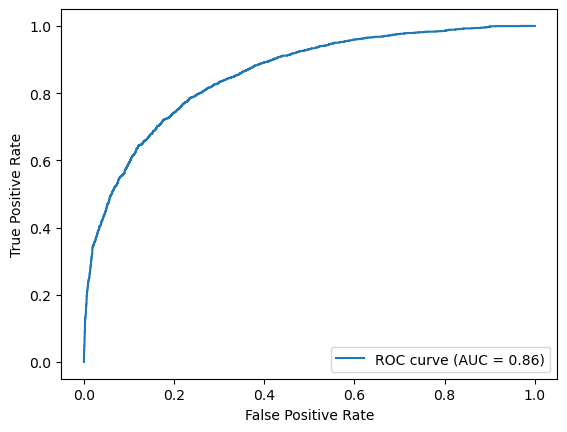

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt 

# Отримання ймовірностей для тестового набору
y_prob = model.predict_proba(X_test)[:, 1]  # Ймовірності для позитивного класу (клас 1)

# Перекодування цільової змінної
le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)  # 'No' -> 0, 'Yes' -> 1

# Перевірка перекодування
print(f"Унікальні значення після перекодування: {set(y_test_numeric)}")  # Має бути {0, 1}

# Побудова ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_prob)

# Розрахунок AUC
auc_score = roc_auc_score(y_test_numeric, y_prob)

# Побудова графіка
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc_score:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


### Висновки:
Модель добре справляється із класифікацією:

AUC = 0.86 означає, що модель має високий рівень передбачення правильних результатів.
